In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici
from scipy.linalg import toeplitz

In [2]:
def get_acf(tau,f1,f2):
    s1,c1=sici(2*np.pi*f1*tau)
    s2,c2=sici(2*np.pi*f2*tau)
    return c2-c1

In [3]:
N=2*1000

In [4]:
taus=np.fft.fftfreq(N)*N
print(taus)
f2=0.5
f1=0.05
print(f1*N,f2*N)
acf1=get_acf(taus[1:],f1,f2)

[ 0.  1.  2. ... -3. -2. -1.]
1000.0 10000.0


In [5]:
acf1[N//2]

9.847037647328078e-05

In [109]:
taus2=np.linspace(0,N//2,N//2*10+1)

In [116]:
acf2=get_acf(taus2[1:],f1,f2)
acf2=np.hstack([10*np.log(f2/f1),10*acf2])

(0.0, 10.0)

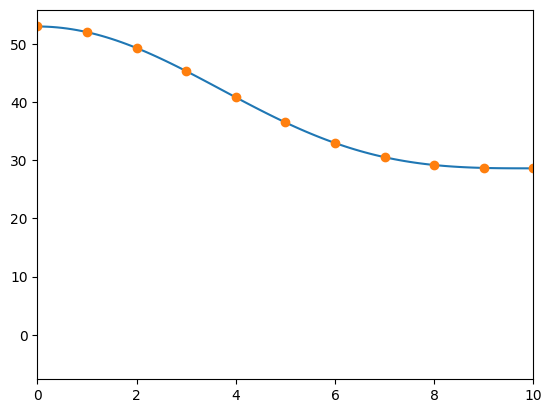

In [124]:
plt.plot(taus2[:N//2],acf2[:N//2])
plt.plot(taus[:N//2],acf1[:N//2],'o')
plt.xlim(0,10)

In [6]:
acf1=np.hstack([np.log(f2/f1),acf1])

In [34]:
ps=np.fft.rfft(acf1-np.mean(acf1))

In [31]:
acf1

array([4.60517019, 4.58059989, 4.50809333, ..., 4.39118487, 4.50809333,
       4.58059989])

In [37]:
ps[1]

(-2.0263004879710125-6.267477991673057e-15j)

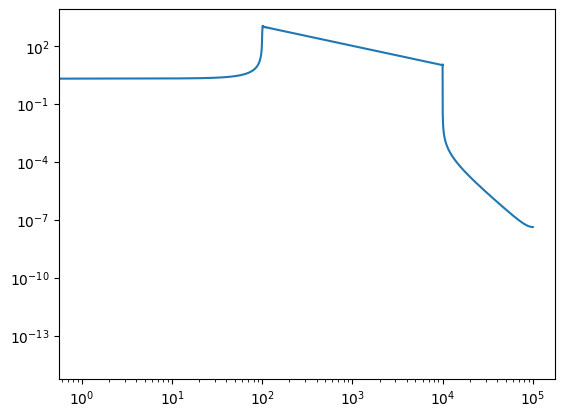

In [36]:
plt.loglog(np.abs(ps))

In [7]:
f1*N, f2*N

(1000.0, 10000.0)

In [8]:
ps=np.zeros(N//2+1,dtype='complex128')
ps[int(f1*N):int(f2*N)+1]=1/np.arange(int(f1*N),int(f2*N)+1)
acf_dft=np.fft.irfft(ps)

In [40]:
amp = acf_dft[:N//2]@acf1[:N//2]/acf_dft[:N//2]@acf_dft[:N//2]

(0.0, 10.0)

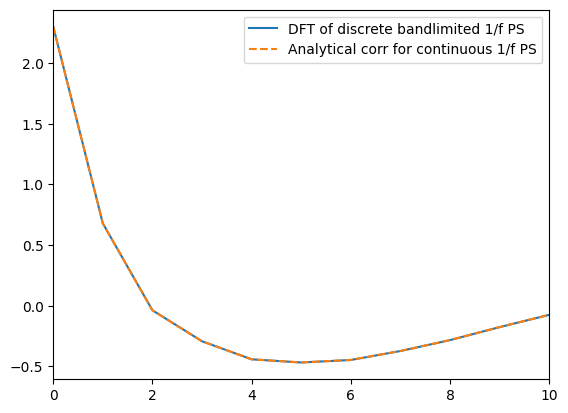

In [9]:
plt.plot(acf_dft*N/2, label='DFT of discrete bandlimited 1/f PS')
plt.plot(acf1,ls='--', label='Analytical corr for continuous 1/f PS')
plt.legend()
plt.xlim(0,10)

In [11]:
Cdft=toeplitz(acf_dft[:N//2]*N/2)+np.eye(N//2)*1e-4
Ccnt=toeplitz(acf1[:N//2])+np.eye(N//2)*1e-4
dC = Ccnt-Cdft
S=acf1[1:N//2+1]

In [12]:
Cdft_inv = np.linalg.inv(Cdft)
Ccnt_inv = np.linalg.inv(Ccnt)

In [13]:
G = dC@Ccnt_inv@S

In [14]:
err_var = Ccnt[0,0] - S.T@Ccnt_inv@S 

In [15]:
err_var

0.7783557141636803

In [89]:
G.T@Ccnt_inv@G

0.05889682271959835

In [16]:
G.T@Ccnt_inv@G

0.016029203469595386

In [17]:
dC

array([[-5.00082500e-04, -4.75616436e-04, -4.04605858e-04, ...,
        -3.65767541e-05, -2.17584345e-04, -3.77322416e-04],
       [-4.75616436e-04, -5.00082500e-04, -4.75616436e-04, ...,
         1.48000057e-04, -3.65767541e-05, -2.17584345e-04],
       [-4.04605858e-04, -4.75616436e-04, -5.00082500e-04, ...,
         3.18074871e-04,  1.48000057e-04, -3.65767541e-05],
       ...,
       [-3.65767541e-05,  1.48000057e-04,  3.18074871e-04, ...,
        -5.00082500e-04, -4.75616436e-04, -4.04605858e-04],
       [-2.17584345e-04, -3.65767541e-05,  1.48000057e-04, ...,
        -4.75616436e-04, -5.00082500e-04, -4.75616436e-04],
       [-3.77322416e-04, -2.17584345e-04, -3.65767541e-05, ...,
        -4.04605858e-04, -4.75616436e-04, -5.00082500e-04]])

In [20]:
0.05/0.77

0.06493506493506494